##  Over and Downregulation

In [1]:
# in this part we want to detect reactions that could be over or down regulated in order to increase the production of our objective resveratrol
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
from cobra.io import read_sbml_model
from cameo.strain_design.deterministic.flux_variability_based import FSEOF
from cameo.strain_design.deterministic import DifferentialFVA

In [2]:
# Verify working directory and change it if needed
import os
os.getcwd()
os.chdir("C:/Users/Deborah/anaconda3/envs/cellfactorydesign/27410-group-assigment-group-4-resveratrol-in-s-cerevisiae/") #change accordingly

In [3]:
# Read the heterologous model
model = read_sbml_model("data/models/yeast_resv.xml")

#### Flux Scanning based on Enforced Objective Flux

In [4]:
# Apply the Flux Scanning based on Enforced Objective Flux from the cameo package
fseof = FSEOF(model)

In [5]:
# Define the final reaction for trans-resveratrol reaction as objective
## the result shows that the amount of reaction rate of the reaction VVVST1 has increased by fold 10
result = fseof.run(target=model.reactions.VVVST1)
df=result.data_frame
df

,1,2,3,4,5,6,7,8,9,10
2DDA7Ptm,-0.176521,-0.152992,-0.139594,-0.120201,-0.101581,-0.061080,-0.049129,-0.037179,-0.025229,-0.013278
ACALDtm,-0.843190,-0.694621,-0.579200,-0.365771,-0.027022,-0.070125,-0.056405,-0.042685,-0.028965,-0.015245
ACCOAC,0.424195,0.733910,1.043587,1.353126,1.661693,1.968925,2.275470,2.582016,2.888561,3.195107
AGPRim,0.042835,0.039400,0.035949,0.032443,0.028544,0.048810,0.039260,0.029710,0.020161,0.010611
ACGKm,0.042835,0.039400,0.035949,0.032443,0.028544,0.048810,0.039260,0.029710,0.020161,0.010611
...,...,...,...,...,...,...,...,...,...,...
UGLT,-0.446925,-0.411087,-0.375085,-0.338499,-0.297816,-0.251504,-0.202297,-0.153090,-0.103882,-0.054675
PYRDC,15.967043,15.988731,16.011570,16.027983,15.718955,15.498931,15.373364,15.228450,15.080402,14.932355
HA-TAL,0.106071,0.212143,0.318214,0.424286,0.530357,0.636428,0.742500,0.848571,0.954643,1.060714
AT-4CL1,0.106071,0.212143,0.318214,0.424286,0.530357,0.636428,0.742500,0.848571,0.954643,1.060714


[Text(0, 0.5, 'Flux $\\left[\\dfrac{mmol}{gDW\\cdot h}\\right]$'),
 Text(0.5, 0, '# of steps of modelling - with each step the resveratrol flux increases'),
 Text(0.5, 1.0, 'all reactions')]

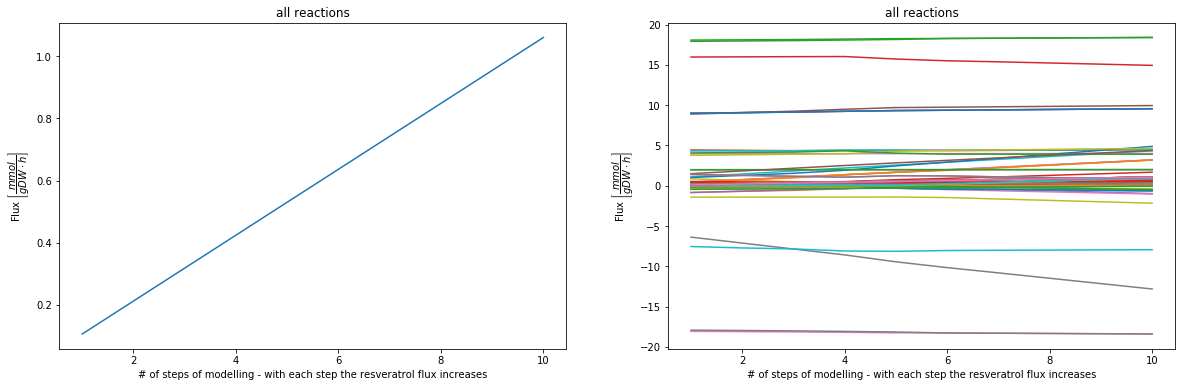

In [6]:
fig,(ax1, ax2)=plt.subplots(1,2, figsize=(20,6))
ax2.plot(df.T)
ax2.set(title='all reactions', xlabel='# of steps of modelling - with each step the resveratrol flux increases', ylabel=r'Flux $\left[\dfrac{mmol}{gDW\cdot h}\right]$')
ax1.plot(df.loc['VVVST1'])
ax1.set(title='all reactions', xlabel='# of steps of modelling - with each step the resveratrol flux increases', ylabel=r'Flux $\left[\dfrac{mmol}{gDW\cdot h}\right]$')

### Downregulation

In [11]:
# Filter for reactions that decrease while the resveratrol flux increases
df1=df[df[1]>df[10]]
df1.shape

(37, 10)

In [12]:
# Filter for reactions that have a relative change higher than 80% -- filter for a significant change
df2=df1[abs(df1[1]-df1[10])/abs(df1[1])>0.8]
df2.shape

(21, 10)

In [13]:
# And filter for reactions theirs difference is bigger than so that reactions with very very low fluxes are filtered out
df3=df2[abs(df2[1]-df2[10])>0.2]
print(df3.shape)
df3=df3.sort_values(by=[10], ascending=False)
df3

(11, 10)


,1,2,3,4,5,6,7,8,9,10
GALT,0.446925,0.411087,0.375085,0.338499,0.297816,0.251504,0.202297,0.153090,0.103882,0.054675
ALCD2irm,0.843190,0.674723,0.506456,0.365771,0.019985,0.000000,0.000000,0.000000,0.000000,0.000000
GHMT2rm,0.000000,0.000000,0.000000,0.000000,0.000000,-0.088105,-0.189655,-0.287337,-0.384392,-0.481447
NH4tm,0.000000,0.000000,0.000000,0.000000,0.000000,-0.088105,-0.189655,-0.287337,-0.384392,-0.481447
SERt2m,0.000000,0.000000,0.000000,0.000000,0.000000,-0.088105,-0.189655,-0.287337,-0.384392,-0.481447
MDHm,0.000000,0.000000,0.000000,-0.023299,-0.322325,-0.377184,-0.422176,-0.463298,-0.503794,-0.544290
SUCD3_u6m,0.000000,0.000000,0.000000,0.000000,-0.293392,-0.416932,-0.454147,-0.514579,-0.578770,-0.642962
SUCCt2r,0.000000,0.000000,0.000000,0.000000,-0.313037,-0.433522,-0.467491,-0.524677,-0.585623,-0.646568
ASAD,-0.115896,-0.106603,-0.097267,-0.098299,-0.087404,-0.250021,-0.438681,-0.619603,-0.799271,-0.978939
ASPTA,-0.404377,-0.402479,-0.367230,-0.337187,-0.301754,-0.480449,-0.624025,-0.759863,-0.894448,-1.029032


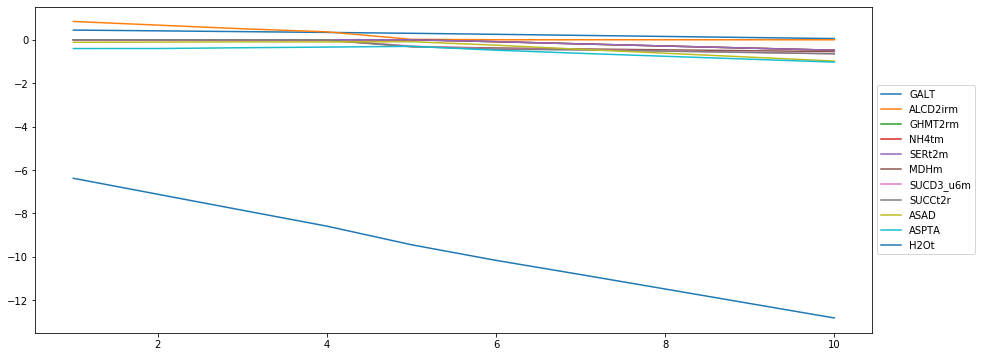

In [14]:
df3.T.plot(figsize=(15,6))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [34]:
# List of the most important reactions for down regulation
down=df3.index.values.tolist()
for rx in down:
    ID = model.reactions.get_by_id(rx)
    print(ID.id,"  ",ID.name, "  ", ID.reaction, "  ", 'boundaries:', ID.bounds)

GALT    Galactose 1 phosphate uridylyltransferase    gal1p_c + h_c + utp_c <=> ppi_c + udpgal_c    boundaries: (-999999.0, 999999.0)
ALCD2irm    Alcohol dehydrogenase  reverse rxn  acetaldehyde   ethanol   mitochondrial    acald_m + h_m + nadh_m --> etoh_m + nad_m    boundaries: (0.0, 999999.0)
GHMT2rm    Glycine hydroxymethyltransferase  reversible  mitochondrial    ser__L_m + thf_m <=> gly_m + h2o_m + mlthf_m    boundaries: (-999999.0, 999999.0)
NH4tm    NH3 mitochondrial transport    nh4_c <=> nh4_m    boundaries: (-999999.0, 999999.0)
SERt2m    Serine mitochondrial transport via proton symport    h_c + ser__L_c <=> h_m + ser__L_m    boundaries: (-999999.0, 999999.0)
MDHm    Malate dehydrogenase  mitochondrial    mal__L_m + nad_m <=> h_m + nadh_m + oaa_m    boundaries: (-999999.0, 999999.0)
SUCD3_u6m    Succinate dehydrogenase  ubiquinone 6   mitochondrial    fadh2_m + q6_m <=> fad_m + q6h2_m    boundaries: (-999999.0, 999999.0)
SUCCt2r    Succinate transport via proton symport    h

### Overexpression

In [40]:
# Filter for reactions theirs flux increases with the resveratrol flux
df4=df[df[1]<df[10]]
df4['change']=abs(df4[10]-df4[1])/df4[1]
print(df4.shape)
df4.head(3)

C:\Users\Deborah\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


(58, 11)


,1,2,3,4,5,6,7,8,9,10,change
2DDA7Ptm,-0.176521,-0.152992,-0.139594,-0.120201,-0.101581,-0.061080,-0.049129,-0.037179,-0.025229,-0.013278,-0.924779
ACALDtm,-0.843190,-0.694621,-0.579200,-0.365771,-0.027022,-0.070125,-0.056405,-0.042685,-0.028965,-0.015245,-0.981920
ACCOAC,0.424195,0.733910,1.043587,1.353126,1.661693,1.968925,2.275470,2.582016,2.888561,3.195107,6.532166


In [42]:
# Filter for reactions that have a relative change higher than 80% -- filter for a significant change
df5=df4[abs(df4[10]-df4[1])/df4[1]>5]

# Filter out reactions that do not have a flux in the beginning since they will not have a big impact on the model
df5=df5[df[1]!=0]

# Sort values
df5=df5.sort_values(by=['change'], ascending=False)
print(df5.shape)
df5.head(3)

C:\Users\Deborah\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


(20, 11)


,1,2,3,4,5,6,7,8,9,10,change
CYSTS,0.001759,0.001618,0.001476,0.001332,0.001172,0.004388,0.122319,0.236379,0.349813,0.463247,262.358158
AT-4CL1,0.106071,0.212143,0.318214,0.424286,0.530357,0.636428,0.742500,0.848571,0.954643,1.060714,9.000038
HA-TAL,0.106071,0.212143,0.318214,0.424286,0.530357,0.636428,0.742500,0.848571,0.954643,1.060714,9.000038


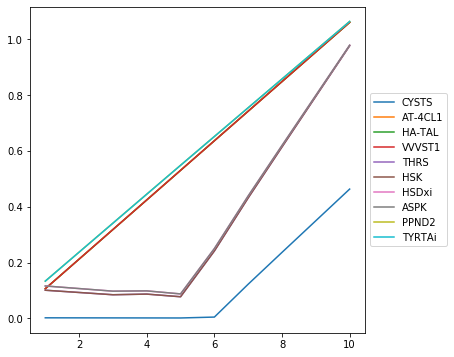

In [18]:
# Overexpression of these reactions and more lead to 10-fold increase of resveratrol
df5.drop(['change'], axis=1, inplace=True)
df5.head(10).T.plot(figsize=(6,6))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [37]:
over=df5.head(10).index.values.tolist()
for rx in over:
    ID = model.reactions.get_by_id(rx)
    print(ID.id,"  ",ID.name, "  ",ID.reaction,"  ", 'boundaries:', ID.bounds)

CYSTS    Cystathionine beta synthase    hcys__L_c + ser__L_c --> cyst__L_c + h2o_c    boundaries: (0.0, 999999.0)
AT-4CL1        atp_c + coa_c + coumarate4 --> amp_c + e4_coumaroyl_coa + ppi_c    boundaries: (0.0, 999999.0)
HA-TAL        tyr__L_c --> coumarate4 + nh4_c    boundaries: (0.0, 999999.0)
VVVST1        e4_coumaroyl_coa + 3.0 h_c + 3.0 malcoa_c --> 4.0 co2_c + 4.0 coa_c + trans_resv    boundaries: (0.0, 999999.0)
THRS    Threonine synthase    h2o_c + phom_c --> pi_c + thr__L_c    boundaries: (0.0, 999999.0)
HSK    Homoserine kinase    atp_c + hom__L_c --> adp_c + h_c + phom_c    boundaries: (0.0, 999999.0)
HSDxi    Homoserine dehydrogenase  NADH   irreversible    aspsa_c + h_c + nadh_c --> hom__L_c + nad_c    boundaries: (0.0, 999999.0)
ASPK    Aspartate kinase    asp__L_c + atp_c --> 4pasp_c + adp_c    boundaries: (0.0, 999999.0)
PPND2    Prephenate dehydrogenase  NADP     nadp_c + pphn_c --> 34hpp_c + co2_c + nadph_c    boundaries: (0.0, 999999.0)
TYRTAi    Tyrosine transam

In [22]:
# Save reaction rates for the highest resveratrol flux as json file
# df[10].to_json('C:/Users/Deborah/anaconda3/envs/cellfactorydesign/27410-group-assigment-group-4-resveratrol-in-s-cerevisiae/data/fseof_reactions.json')

### Simulations

In [23]:
m=model
m

Name,iMM904
Memory address,0x01a85a1c9f08
Number of metabolites,1229
Number of reactions,1581
Number of groups,0
Objective expression,1.0*BIOMASS_SC5_notrace - 1.0*BIOMASS_SC5_notrace_reverse_93090
Compartments,"cytosol, extracellular space, mitochondria, peroxisome/glyoxysome, endoplasmic reticulum, vacuole, golgi apparatus, nucleus"


In [21]:
for d in down:
    r=m.reactions.get_by_id(d)
    print(r.id, r.bounds)
print('-')
for o in over:
    r=m.reactions.get_by_id(o)
    print(r.id, r.bounds)

GALT (-999999.0, 999999.0)
ALCD2irm (0.0, 999999.0)
GHMT2rm (-999999.0, 999999.0)
NH4tm (-999999.0, 999999.0)
SERt2m (-999999.0, 999999.0)
MDHm (-999999.0, 999999.0)
SUCD3_u6m (-999999.0, 999999.0)
SUCCt2r (-999999.0, 999999.0)
ASAD (-999999.0, 0.0)
ASPTA (-999999.0, 999999.0)
H2Ot (-999999.0, 999999.0)
-
CYSTS (0.0, 999999.0)
AT-4CL1 (0.0, 999999.0)
HA-TAL (0.0, 999999.0)
VVVST1 (0.0, 999999.0)
THRS (0.0, 999999.0)
HSK (0.0, 999999.0)
HSDxi (0.0, 999999.0)
ASPK (0.0, 999999.0)
PPND2 (0.0, 999999.0)
TYRTAi (0.0, 999999.0)


In [36]:
# problem that the rv max production value is not divided by 3
print(m.reactions.EX_glc__D_e.bounds)

with m:
    m.reactions.EX_glc__D_e.bounds=(-100, 999999) 
    m.reactions.H2Ot.bounds=(-999999,0)
    #m.reactions.GLUDy.bounds=(-100,100)
    
    '''
    for d in down:
        rx=m.reactions.get_by_id(d)
        rx.bounds=(-100, 100)
        print(rx.id, rx.bounds)
    '''
    m.objective=m.reactions.VVVST1
    rv_maxp=m.optimize().objective_value
    print("Maximum resveratrol productivity = ",rv_maxp, " mmol/gDW*h")

    glucose_uptake_flux = m.reactions.EX_glc__D_e.flux # Glucose exchange reaction
    
    max_yield= rv_maxp / (-1*glucose_uptake_flux)
    print("Maximum theoretical yield is = ", max_yield, "mmol/gDW*h")
    
# Here, we can downregulate by lowering the lower bound (increasing the uptake of the substrate) but by decreasing the upper bound, we can ensure there is no metabolite production. 
# This depicts an increase in the trans-resveratrol yield from 1.17 to 2.64 mmol/gDWh
'''
default:
Maximum resveratrol productivity =  1.1785714285714284  mmol/gDW*h
Maximum theoretical yield is =  0.11785714285714284 mmol/gDW*h

with glucose boundaries of -100,99999:
Maximum resveratrol productivity =  8.892857142857155  mmol/gDW*h
Maximum theoretical yield is =  0.08892857142857155 mmol/gDW*h
'''

(-10.0, 999999.0)
Maximum resveratrol productivity =  8.89285714285779  mmol/gDW*h
Maximum theoretical yield is =  0.08892857142857791 mmol/gDW*h


'\ndefault:\nMaximum resveratrol productivity =  1.1785714285714284  mmol/gDW*h\nMaximum theoretical yield is =  0.11785714285714284 mmol/gDW*h\n\nwith glucose boundaries of -100,99999:\nMaximum resveratrol productivity =  8.892857142857155  mmol/gDW*h\nMaximum theoretical yield is =  0.08892857142857155 mmol/gDW*h\n'

### Differential Flux Variability Analysis

In [63]:
# Set the original model as reference to be compared with a set of models where n-reaction bounds are varied
reference_model = model.copy()
biomass_rxn = reference_model.reactions.BIOMASS_SC5_notrace
target = reference_model.metabolites.trans_resv

In [64]:
diff_fva = DifferentialFVA(design_space_model=model,
                           reference_model=reference_model,
                           objective=target,
                           variables=[biomass_rxn],
                           normalize_ranges_by=biomass_rxn,
                           points=10)

In [65]:
result = diff_fva.run(surface_only=True)
result

,lower_bound,upper_bound,gaps,normalized_gaps,biomass,production,KO,flux_reversal,suddenly_essential,free_flux,reaction,excluded
reaction,,,,,,,,,,,,
PGL,0.000371,0.000371,-0.802099,-2.784754,0.12794,0.716157,False,False,False,False,PGL,False
GND,0.000371,0.000371,-0.802099,-2.784754,0.12794,0.716157,False,False,False,False,GND,False
G6PDH2r,0.000000,0.000000,-0.801635,-2.784754,0.12794,0.716157,True,False,False,False,G6PDH2r,False
PDHm,0.209950,0.209950,-0.498439,-0.819831,0.12794,0.716157,False,False,False,False,PDHm,False
CSm,0.130346,0.130346,-0.398933,-0.819831,0.12794,0.716157,False,False,False,False,CSm,False
...,...,...,...,...,...,...,...,...,...,...,...,...
PYK,16.792033,16.792033,-0.929957,69.685565,0.12794,0.716157,False,False,False,False,PYK,False
GAPD,18.291976,18.291976,0.253771,80.310856,0.12794,0.716157,False,False,False,False,GAPD,False
PGK,-18.291976,-18.291976,0.253771,80.310856,0.12794,0.716157,False,False,False,False,PGK,False


In [ ]:
# Visualize the reaction rate changes in escher map
result.display_on_map(5, map_name="iMM904.Central carbon metabolism")